## Installing the required packages for the bert topic modelling.

In [ ]:
!pip install bertopic[visualization] --quiet

     |████████████████████████████████| 58 kB 2.9 MB/s 
     |████████████████████████████████| 79 kB 6.4 MB/s 
     |████████████████████████████████| 5.2 MB 54.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 4.0 MB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 51.3 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 895 kB 55.8 MB/s 
     |████████████████████████████████| 636 kB 44.3 MB/s 
     |████████████████████████████████| 6.6 MB 32.9 MB/s 
     |████████████████████████████████| 1.1 MB 63.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
# from jupytertehmes import jtplot


from sklearn.decomposition import TruncatedSVD, PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim import corpora
from gensim.models.ldamodel import LdaModel

Content Based Recomendation system:- Identifying the past user activity and using content attributes input, provide recommendation to user.
Knowledge Based Recomendation system:- Capturing explicit recomendations from the user and using domain knowledge as input, recommendation to 


In [ ]:
%%capture
!pip install bertopic

## Importing the dataset and manuplating the dataset.

In [ ]:
from sklearn import datasets
dataa = datasets.fetch_20newsgroups()

In [ ]:
dataa['Target'] = pd.Series(data=dataa)

In [ ]:
for idx in range(10):
    print(dataa.data[idx],'\n\n','#'*100, '\n\n')

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 

 #################################################################################################### 


From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article

In [ ]:
# put your data into a dataframe
news_df = pd.DataFrame({'News': dataa.data,
                       'Target': dataa.target})

# get dimensions of data 
news_df.shape

(11314, 2)

In [ ]:
news_df.head()

,News,Target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
# replace target names from target numbers in our news data frame
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataa.target_names[x])

In [ ]:
docs = list(news_df.loc[:, "News"].values)


## Data Preprocessing using NLP techniques

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install tqdm

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
import re

In [ ]:
# clean text data
# remove non alphabetic characters
# remove stopwords and lemmatize

def clean_text(sentence):
    # remove non alphabetic sequences
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    # Tokenize
    word_list = word_tokenize(sentence)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    # puctuation
    # punct = set(string.punctuation)
    
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    # remove very small words, length < 3
    # they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 2]
    # remove punctuation
    # word_list = [word for word in word_list if word not in punct]
    
    # stemming
    # ps  = PorterStemmer()
    # word_list = [ps.stem(word) for word in word_list]
    
    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

# we'll use tqdm to monitor progress of data cleaning process
# create tqdm for pandas
tqdm.pandas()
# clean text data
news_df['News'] = news_df['News'].progress_apply(lambda x: clean_text(str(x)))

  0%|          | 0/11314 [00:00<?, ?it/s]

In [ ]:
news_df.head()

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek organiza...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space


In [ ]:
# replace target names from target numbers in our news data frame
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataa.target_names[x])

In [ ]:
news_df.head()

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek organiza...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space


In [ ]:
news_df['Target_name']=news_df['Target_name'].replace(['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],['Religion','Tech','Tech','Tech','Tech','Tech','Auto','Auto','Auto','sport','sport','Science','Science','Science','Science','Religion','Politics','Politics','Politics','Religion'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

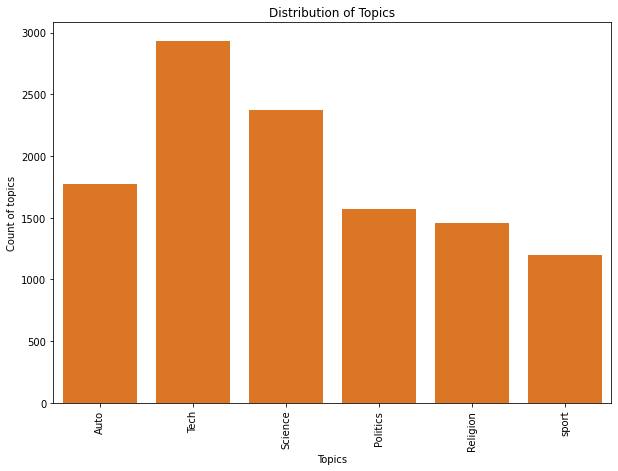

In [ ]:
# plot distribution of topics in news data
fig = plt.figure(figsize=[10,7])
ax = sns.countplot(news_df['Target_name'], color=sns.xkcd_rgb['orange'])
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count of topics')
plt.xticks(rotation=90)

In [ ]:
news_df

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,Auto
1,guykuo carson washington edu guy kuo subject c...,4,Tech
2,twillis ecn purdue edu thomas willis subject q...,4,Tech
3,jgreen amber joe green subject weitek organiza...,1,Tech
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,Science
...,...,...,...
11309,jim zisfein factory com jim zisfein subject mi...,13,Science
11310,ebodin pearl tuft edu subject screen death mac...,4,Tech
11311,westes netcom com estes subject mounting cpu c...,3,Tech
11312,steve hcrlgw steven collins subject sphere poi...,1,Tech


In [ ]:
import pandas as pd

## Bertopic modelling

In [ ]:
model = BERTopic(language="english")

In [ ]:
topics, probs = model.fit_transform(docs)
# time taken to train was 27min

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
model.get_topic(0)

[('clipper', 0.01717742665300715),
 ('encryption', 0.0158543641476226),
 ('chip', 0.014201543520559983),
 ('key', 0.012615046570702977),
 ('keys', 0.008691996628399212),
 ('government', 0.008590529464872047),
 ('escrow', 0.008207445853780897),
 ('crypto', 0.00765831950830732),
 ('secure', 0.007135568931876152),
 ('algorithm', 0.0069749394621508145)]

In [ ]:
model.get_topic(1)

[('gun', 0.016743475849153294),
 ('guns', 0.009878984769487155),
 ('firearms', 0.007705664546511237),
 ('weapons', 0.006996342391530406),
 ('militia', 0.006690159570511367),
 ('amendment', 0.005737097624681212),
 ('control', 0.005644154751043548),
 ('crime', 0.005140858075804986),
 ('of', 0.00509684707096881),
 ('weapon', 0.005000056452973138)]

In [ ]:
model.get_topic(2)

[('car', 0.020967805713685287),
 ('cars', 0.01332484021279566),
 ('saturn', 0.008600777177705693),
 ('engine', 0.007826107143759413),
 ('dealer', 0.007773379920745051),
 ('toyota', 0.006536563159057504),
 ('price', 0.0060353583339545075),
 ('ford', 0.00534511187610485),
 ('wagon', 0.005199810044153668),
 ('integra', 0.005087439637520826)]

In [ ]:
model.get_topic(3)

[('bike', 0.02242439348146),
 ('dod', 0.01679785799452005),
 ('bikes', 0.012500499852041085),
 ('motorcycle', 0.010113230692015031),
 ('ride', 0.009608411025817661),
 ('honda', 0.008726280620544908),
 ('riding', 0.007693604350240614),
 ('harley', 0.005868440189421682),
 ('miles', 0.005618373997924703),
 ('advice', 0.0055468729338042705)]

In [ ]:
model.get_topic(4)

[('sale', 0.020059286055716663),
 ('motherboard', 0.01305413413262632),
 ('ram', 0.010520536221107008),
 ('price', 0.009451874546248358),
 ('shipping', 0.00926066045713468),
 ('ca', 0.00875286697178687),
 ('offer', 0.008231994856867611),
 ('monitor', 0.008222473711723752),
 ('for', 0.007814287537112176),
 ('486', 0.00731782579746799)]

In [ ]:
model.get_topic(4)

[('sale', 0.020059286055716663),
 ('motherboard', 0.01305413413262632),
 ('ram', 0.010520536221107008),
 ('price', 0.009451874546248358),
 ('shipping', 0.00926066045713468),
 ('ca', 0.00875286697178687),
 ('offer', 0.008231994856867611),
 ('monitor', 0.008222473711723752),
 ('for', 0.007814287537112176),
 ('486', 0.00731782579746799)]

In [ ]:
model.get_topic(5)

[('anonymous', 0.015875328706151583),
 ('internet', 0.01202721784804627),
 ('anonymity', 0.011892355296246356),
 ('ripem', 0.010137689117222959),
 ('mail', 0.009583526859305367),
 ('privacy', 0.008258277120221466),
 ('posting', 0.007506645662869331),
 ('address', 0.007194828908907943),
 ('email', 0.006779889149347566),
 ('users', 0.006367663689864852)]

In [ ]:
model.get_topic(6)

[('550', 0.027539278836862285),
 ('25', 0.018838374752708484),
 ('period', 0.014193149816593186),
 ('vs', 0.01376424717907558),
 ('bos', 0.013691660880501742),
 ('chi', 0.013470777617318607),
 ('det', 0.013048314482115407),
 ('pp', 0.01297739018664402),
 ('tor', 0.012113975637138754),
 ('gm', 0.011643645685261605)]

In [ ]:
model.get_topic(7)

[('sale', 0.016949118101094608),
 ('motherboard', 0.01627606259162451),
 ('ram', 0.010868003391132015),
 ('486', 0.00956786495498207),
 ('ca', 0.0090566955748441),
 ('monitor', 0.008885995488503119),
 ('offer', 0.00817901307725114),
 ('price', 0.008063664583468116),
 ('software', 0.008010275897912185),
 ('shipping', 0.007761726991065711)]

In [ ]:
model.get_topic(8)

[('bike', 0.024725696687542632),
 ('dod', 0.018827005335550012),
 ('bikes', 0.012161416610839627),
 ('motorcycle', 0.011763576604433303),
 ('honda', 0.009862708253309012),
 ('ride', 0.009489081507486783),
 ('riding', 0.006971561660540321),
 ('miles', 0.006606452043393213),
 ('advice', 0.006102527962113726),
 ('denizens', 0.006007785332860587)]

In [ ]:
model.get_topic(9)

[('card', 0.03552841172842774),
 ('drivers', 0.031629372817049875),
 ('ati', 0.022338469495992178),
 ('diamond', 0.021358885657927217),
 ('video', 0.01741584362336067),
 ('driver', 0.015980472969972712),
 ('ultra', 0.014791050452694687),
 ('windows', 0.014780893469332783),
 ('stealth', 0.013019247096687753),
 ('vga', 0.010875847804728824)]

In [ ]:
model.get_topic(10)

[('morality', 0.035401817963240684),
 ('objective', 0.027621971876051785),
 ('moral', 0.024151625259261573),
 ('values', 0.01292640660968118),
 ('keith', 0.010368121954733503),
 ('odwyer', 0.008999623017433973),
 ('frankd012s658uucp', 0.0082909269431357),
 ('animals', 0.007943188139066429),
 ('that', 0.007897419024473518),
 ('is', 0.007841941656643633)]

In [ ]:
model.get_topic(11)

[('x11r5', 0.018804321567215187),
 ('symbol', 0.014055966041085954),
 ('server', 0.013823346908656378),
 ('undefined', 0.012242249984580986),
 ('libxmulibxmuso', 0.012187528170240493),
 ('doug', 0.011353977851135627),
 ('xterm', 0.011086400219003038),
 ('problem', 0.010901424441832553),
 ('sunos', 0.010612606232654549),
 ('openwindows', 0.010562732179806439)]

In [ ]:
model.get_topic(12)

[('traffic', 0.012038853792749545),
 ('lane', 0.01102279975793539),
 ('car', 0.01001150904929891),
 ('speed', 0.009963164049622532),
 ('130', 0.009836553743439544),
 ('lights', 0.0093138543177866),
 ('fast', 0.007813785535516435),
 ('ticket', 0.007502543857622937),
 ('cars', 0.007285697278531252),
 ('cop', 0.006889249848709618)]

In [ ]:
model.get_topic(13)

[('espn', 0.03229465738763204),
 ('pts', 0.02907128480707467),
 ('pt', 0.027102462075856922),
 ('abc', 0.025661789362331038),
 ('la', 0.024747591159884987),
 ('coverage', 0.020221944778408087),
 ('game', 0.019030101122520997),
 ('games', 0.01753336113769494),
 ('hockey', 0.015185296653747547),
 ('16005', 0.014344761338034893)]

In [ ]:
model.get_topic(14)

[('jews', 0.02152018008443661),
 ('nazi', 0.017248962186064143),
 ('holocaust', 0.013993336753654054),
 ('zionism', 0.011885187946466159),
 ('jewish', 0.008996818124775452),
 ('racism', 0.007706636328715064),
 ('germany', 0.007601668841301046),
 ('were', 0.0075886245954707495),
 ('antisemitism', 0.007527977459573919),
 ('nazis', 0.0072653604536887404)]

In [ ]:
model.get_topic(15)

[('migraine', 0.02022026661785448),
 ('pain', 0.01839717098759906),
 ('banks', 0.012076332771879819),
 ('gordon', 0.011905560340608246),
 ('migraines', 0.010388827513740418),
 ('gebcspittedu', 0.009751072983783245),
 ('headache', 0.0085198151863479),
 ('acne', 0.007928533302760514),
 ('exercise', 0.007916254787620992),
 ('doctor', 0.007840687232279084)]

In [ ]:
model.get_topic(15)

[('migraine', 0.02022026661785448),
 ('pain', 0.01839717098759906),
 ('banks', 0.012076332771879819),
 ('gordon', 0.011905560340608246),
 ('migraines', 0.010388827513740418),
 ('gebcspittedu', 0.009751072983783245),
 ('headache', 0.0085198151863479),
 ('acne', 0.007928533302760514),
 ('exercise', 0.007916254787620992),
 ('doctor', 0.007840687232279084)]

In [ ]:
model.get_topic(16)

[('printer', 0.05392513787401359),
 ('deskjet', 0.028497882222863532),
 ('ink', 0.026693736304676027),
 ('hp', 0.026056927005175333),
 ('printers', 0.025325273795093948),
 ('laser', 0.02315054234139753),
 ('bj200', 0.020701302437493865),
 ('bubblejet', 0.018902667259095535),
 ('print', 0.015921111383572304),
 ('canon', 0.015591400539662367)]

In [ ]:
model.get_topic(17)

[('msg', 0.06243435597807998),
 ('food', 0.02767263555953477),
 ('sensitivity', 0.020400396948256187),
 ('chinese', 0.01831772570312347),
 ('superstition', 0.01765019106827997),
 ('glutamate', 0.01484319296886501),
 ('foods', 0.010597608804288927),
 ('restaurant', 0.009891869005355682),
 ('effects', 0.009735567165125518),
 ('reaction', 0.008814232723799819)]

In [ ]:
model.get_topic(18)

[('bmp', 0.0219705346776858),
 ('files', 0.018368096442634426),
 ('gif', 0.01782166847110797),
 ('bitmap', 0.014268071557475824),
 ('image', 0.013531676602362238),
 ('scodal', 0.012758018209784757),
 ('format', 0.012012405091679708),
 ('file', 0.009436541263940347),
 ('convert', 0.008589087922568114),
 ('grasp', 0.008487678038093204)]

In [ ]:
model.get_topic(19)

[('windows', 0.03332841664442454),
 ('swap', 0.03196001003413653),
 ('allocation', 0.02416004734781886),
 ('memory', 0.018939553432019363),
 ('file', 0.01786878673701311),
 ('disk', 0.017186488668377263),
 ('linked', 0.01696105423250382),
 ('dos', 0.01456307865253098),
 ('cross', 0.014215993175979665),
 ('unit', 0.013423943105403272)]

In [ ]:
model.get_topic(20)

[('radar', 0.05321961776660974),
 ('detector', 0.03215882378947737),
 ('detectors', 0.02017821270852369),
 ('car', 0.0106527025533201),
 ('police', 0.009327714235756207),
 ('traffic', 0.008617427205768366),
 ('alarm', 0.00737733691559943),
 ('radio', 0.007018128492357249),
 ('antenna', 0.006519174118698661),
 ('illegal', 0.0065185487553598214)]

## visualizing the topics

In [ ]:
model.visualize_topics()